# FINAL PROJECT ASSIGNMENT

   Beyza Nur Elaslan - 10399180764
   
   Mehmet Doğukan Hiçyılmaz - 11686049498
   
   Doğa Durmaz - 37969823142 

## Dataset Information
### Input variables:
### bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# Read Data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-additional.csv',sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,5.8,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,16.4,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,1.8,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,29.7,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,22.6,5195.8,no


In [3]:
df.describe()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,93.579704,-40.499102,12.442149,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,0.579349,4.594578,10.588732,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,93.075000,-42.700000,2.800000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,93.749000,-41.800000,7.800000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,93.994000,-36.400000,20.400000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,94.767000,-26.900000,31.700000,5228.100000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   object 
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [5]:
df.apply(lambda x: len(x.unique()))

age                67
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
duration          828
campaign           25
pdays              21
previous            7
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         213
nr.employed        11
y                   2
dtype: int64

# Data Cleaning

In [6]:
# check for null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### HANDLING OUTLIERS 
We have performed the handling outliers operation on the age and campaign attributes.

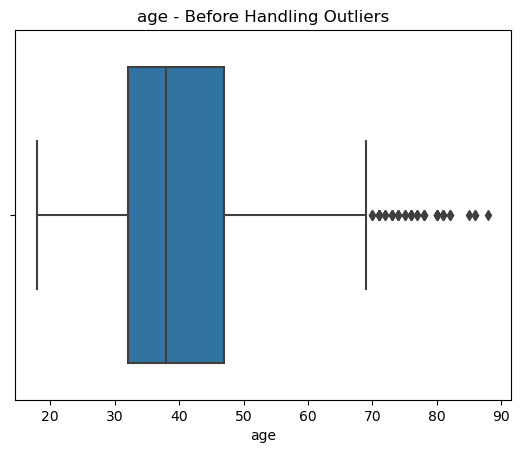

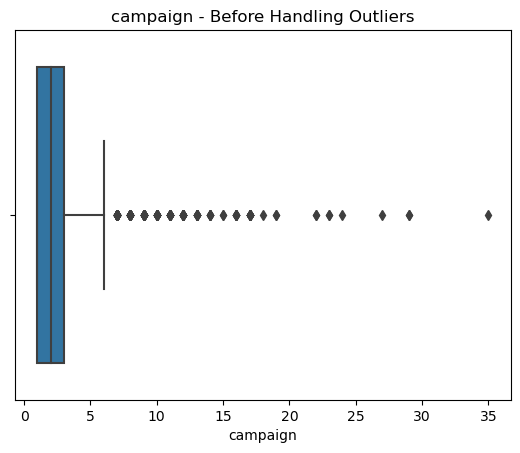

In [7]:
columns_to_check = ["age", "campaign"]
for column in columns_to_check:
    plt.figure()
    sns.boxplot(x=df[column])
    plt.title(f'{column} - Before Handling Outliers')
    plt.show()

In [8]:
def handle_outliers(data, feature):
    
    column = data[feature]
    
    
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    
   
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
   
    data= data[(column >= lower_limit) & (column <= upper_limit)]
    
    return data


In [9]:
for column in columns_to_check:
    df= handle_outliers(df, column)

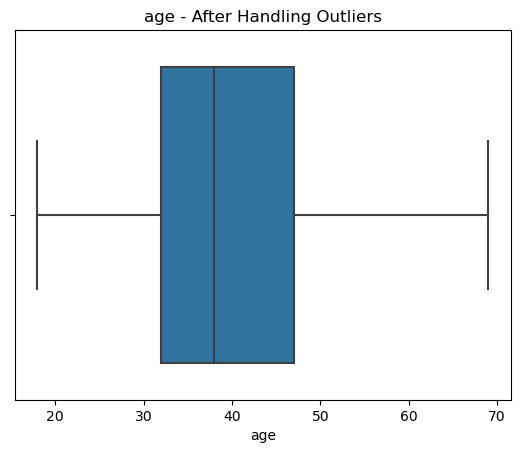

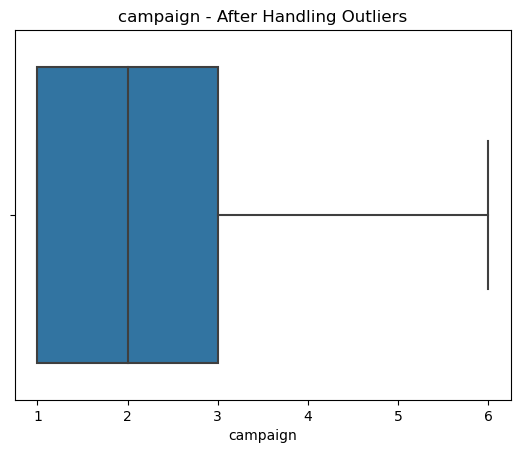

In [10]:
for column in columns_to_check:
    plt.figure()
    sns.boxplot(x=df[column])
    plt.title(f'{column} - After Handling Outliers')
    plt.show()

In [11]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,5.8,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,16.4,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,1.8,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,29.7,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,22.6,5195.8,no


# Preprocessing

### ENCODING
We apply encode operation on non-numeric , categorical attributes. We use different techniques such as lambda function , Ordinal Encoding and Label Encoding.

In [12]:
marital_dict = {'single':0, 'married':1, 'divorced':2,'unknown':3}
df['marital'] = df['marital'].apply(lambda x: marital_dict[x])

default_dict = {'no':0, 'yes':1,'unknown':2}
df['default'] = df['default'].apply(lambda x: default_dict[x])

housing_dict = {'no':0, 'yes':1, 'unknown':2}
df['housing'] = df['housing'].apply(lambda x: housing_dict[x])

loan_dict = {'no':0, 'yes':1, 'unknown':2}
df['loan'] = df['loan'].apply(lambda x: loan_dict[x])

contact_dict = {'cellular':0, 'telephone':1}
df['contact'] = df['contact'].apply(lambda x: contact_dict[x])

poutcome_dict = {'nonexistent':2, 'success':1 , 'failure':0 }
df['poutcome'] = df['poutcome'].apply(lambda x: poutcome_dict[x])

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,1,basic.9y,0,1,0,0,may,fri,...,2,999,0,2,-1.8,92.893,-46.2,5.8,5099.1,no
1,39,services,0,high.school,0,0,0,1,may,fri,...,4,999,0,2,1.1,93.994,-36.4,16.4,5191.0,no
2,25,services,1,high.school,0,1,0,1,jun,wed,...,1,999,0,2,1.4,94.465,-41.8,1.8,5228.1,no
3,38,services,1,basic.9y,0,2,2,1,jun,fri,...,3,999,0,2,1.4,94.465,-41.8,29.7,5228.1,no
4,47,admin.,1,university.degree,0,1,0,0,nov,mon,...,1,999,0,2,-0.1,93.200,-42.0,22.6,5195.8,no


In [13]:
from sklearn.preprocessing import OrdinalEncoder
education = df[['education']]

# OrdinalEncoder 
encoder = OrdinalEncoder(categories=[['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree', 'unknown']])
education_encoded = encoder.fit_transform(education)
education_encoded = education_encoded.astype(int)

df['education'] = education_encoded



In [14]:
from sklearn.preprocessing import LabelEncoder
jobs = df[['job']]


encoder = LabelEncoder()
jobs_encoded = encoder.fit_transform(jobs.values.ravel())

df['job'] = jobs_encoded

In [15]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,3,0,1,0,0,may,fri,...,2,999,0,2,-1.8,92.893,-46.2,5.8,5099.1,no
1,39,7,0,4,0,0,0,1,may,fri,...,4,999,0,2,1.1,93.994,-36.4,16.4,5191.0,no
2,25,7,1,4,0,1,0,1,jun,wed,...,1,999,0,2,1.4,94.465,-41.8,1.8,5228.1,no
3,38,7,1,3,0,2,2,1,jun,fri,...,3,999,0,2,1.4,94.465,-41.8,29.7,5228.1,no
4,47,0,1,6,0,1,0,0,nov,mon,...,1,999,0,2,-0.1,93.200,-42.0,22.6,5195.8,no


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3845 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3845 non-null   int64  
 1   job             3845 non-null   int64  
 2   marital         3845 non-null   int64  
 3   education       3845 non-null   int64  
 4   default         3845 non-null   int64  
 5   housing         3845 non-null   int64  
 6   loan            3845 non-null   int64  
 7   contact         3845 non-null   int64  
 8   month           3845 non-null   object 
 9   day_of_week     3845 non-null   object 
 10  duration        3845 non-null   int64  
 11  campaign        3845 non-null   int64  
 12  pdays           3845 non-null   int64  
 13  previous        3845 non-null   int64  
 14  poutcome        3845 non-null   int64  
 15  emp.var.rate    3845 non-null   object 
 16  cons.price.idx  3845 non-null   float64
 17  cons.conf.idx   3845 non-null   f

In [17]:
df.describe()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000
mean,39.762289,3.814564,0.829909,4.300130,0.386736,0.578414,0.214304,0.350585,261.708192,2.052016,960.515475,0.191938,1.737581,93.568597,-40.560936,12.492057,5165.656229
std,9.725161,3.613291,0.606237,1.700344,0.789816,0.543050,0.468413,0.477215,256.306110,1.276906,191.698642,0.532588,0.649225,0.577897,4.602595,10.543266,73.262302
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,108.000000,1.000000,999.000000,0.000000,2.000000,93.075000,-42.700000,2.800000,5099.100000
50%,38.000000,2.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,184.000000,2.000000,999.000000,0.000000,2.000000,93.444000,-41.800000,7.800000,5191.000000
75%,47.000000,7.000000,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,322.000000,3.000000,999.000000,0.000000,2.000000,93.994000,-36.400000,20.400000,5228.100000
max,69.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,3643.000000,6.000000,999.000000,6.000000,2.000000,94.767000,-26.900000,31.700000,5228.100000


In [18]:
df= df.drop(columns=[ 'month', 'day_of_week','emp.var.rate'])


### INPUT SPLIT

In [19]:
# Separate the features and the target variable
df['y'] = df['y'].map({'no': 0, 'yes': 1})
X = df.drop('y', axis=1)
y = df['y']

### SCALING AND NORMALIZATION

We perform scaling and normalization operations on numerical an non-catogorical attributes which have high std.

In [20]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['duration', 'cons.price.idx',  'cons.conf.idx', 'nr.employed', 'campaign','euribor3m']


scaler = StandardScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Feature  Selection and Engineering 

We use  RandomForestClassifier feature selection techniques to select the most relevant features for the model.

In [22]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [23]:
model_rf = RandomForestClassifier()
model_rf.fit(X, y)
importance_rf = model_rf.feature_importances_
selected_features_rf = X.columns[np.argsort(importance_rf)[::-1]][:10]


In [24]:
print("\nSelected Features - Feature Importance:\n", selected_features_rf)


Selected Features - Feature Importance:
 Index(['duration', 'euribor3m', 'age', 'nr.employed', 'pdays', 'job',
       'cons.conf.idx', 'cons.price.idx', 'education', 'campaign'],
      dtype='object')


We create new features where appropriate.

In [25]:
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 60, 90], labels=[0, 1, 2])
df['duration_mean'] = df.groupby('job')['duration'].transform('mean')


In [26]:
df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,duration_mean
0,30,1,1,3,0,1,0,0,0.133681,0.2,999,0,2,0.269680,0.192469,0.166264,0.512287,0,0,0.073121
1,39,7,0,4,0,0,0,1,0.094977,0.6,999,0,2,0.698753,0.602510,0.507484,0.859735,0,1,0.065388
2,25,7,1,4,0,1,0,1,0.062311,0.0,999,0,2,0.882307,0.376569,0.037502,1.000000,0,0,0.065388
3,38,7,1,3,0,2,2,1,0.004666,0.4,999,0,2,0.882307,0.376569,0.935619,1.000000,0,1,0.065388
4,47,0,1,6,0,1,0,0,0.015921,0.0,999,0,2,0.389322,0.368201,0.707066,0.877883,0,1,0.073610


# Model Selection and Training

We train and compare the performance of 4  different models and choose the best one based on evaluation metrics. After that we tune the hyperparameters of the selected model to improve its performance. We create a pipeline for whole process.

In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, mean_squared_error

def train(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
    model.fit(x_train, y_train)
    
    # predict the results
    pred = model.predict(x_test)
    
    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))
    print("pred:", pred)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the classifiers and their corresponding parameters
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=0), {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [3, 5, 7],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': ['auto', 'sqrt']
    }),
    ('Gradient Boosting', GradientBoostingClassifier(), {
        
    }),
    ('SGD Classifier', SGDClassifier(loss='log', max_iter=1000, random_state=42), {
        
    }),
    ('Naive Bayes', GaussianNB(), {})
]

for name, classifier, params in classifiers:
    # pipeline with the classifier
    pipeline = Pipeline([
        ('classifier', classifier)
    ])
    
    # grid search to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, params, cv=5)
    grid_search.fit(X_train, y_train)
    
    # Get the best model with the tuned hyperparameters
    best_model = grid_search.best_estimator_
    
    # Fit the best model on the training data
    best_model.fit(X_train, y_train)
    
    # Call the train function to evaluate the model
    train(best_model, X, y)
    
    # Predict the labels for the test set
    y_pred = best_model.predict(X_test)
    
    # Calculate accuracy, recall, and precision
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    # Print the evaluation metrics
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print()
    
    # Optional: Print the best hyperparameters
    print("Best Hyperparameters: ", grid_search.best_params_)
    print()
    
    # Optional: Print classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)
    print()


Results
MSE: 0.27932670302372925
CV Score: 0.30299759448332064
pred: [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 

In [28]:
X.head(159)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,1,1,3,0,1,0,0,487,2,999,0,2,92.893,-46.2,5.80,5099.1
1,39,7,0,4,0,0,0,1,346,4,999,0,2,93.994,-36.4,16.40,5191.0
2,25,7,1,4,0,1,0,1,227,1,999,0,2,94.465,-41.8,1.80,5228.1
3,38,7,1,3,0,2,2,1,17,3,999,0,2,94.465,-41.8,29.70,5228.1
4,47,0,1,6,0,1,0,0,58,1,999,0,2,93.200,-42.0,22.60,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,32,0,0,4,0,0,0,0,74,2,999,2,0,94.767,-50.8,13.11,4963.6
164,52,7,2,4,2,0,0,0,190,1,999,0,2,93.200,-42.0,22.60,5195.8
165,45,0,1,4,0,1,0,0,738,3,6,1,1,94.601,-49.5,25.10,4963.6
166,32,0,1,6,0,1,0,0,374,2,999,0,2,92.893,-46.2,5.80,5099.1


## TEST THE PREDICTION SYSTEM WITH EXAMPLE DATA

In [29]:
#BULDING THE PREDICTION SYSTEM
input_data = (24,9,1,6,0,1,1,0,89,2,3,1,1,92.379,-29.8,0.770,5017.5
)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = best_model.predict(input_data_reshaped)
if prediction == 0:
    prediction = "no"
else:
    prediction = "yes"
print('Predict: ',str(prediction))

Predict:  yes


In [30]:
input_data = (45,1,1,4,0,1,0,0,738,3,6,1,1,94.601,-49.5,1.029,4963.6
)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = best_model.predict(input_data_reshaped)
if prediction == 0:
    prediction = "no"
else:
    prediction = "yes"
print('Predict : ',str(prediction))

Predict :  yes


In [31]:
input_data = (32,1,1,6,0,1,0,0,374,2,999,0,2,92.893,-46.2,1.313,5099.1
)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = best_model.predict(input_data_reshaped)
if prediction == 0:
    prediction = "no"
else:
    prediction = "yes"
print('Predict : ',str(prediction))

Predict :  no


In [32]:
input_data = (50,1,1,1,0,0,1,0,849,1,999,0,2,93.918,-42.7,31.700,5228.1
)
input_data_array = np.asarray(input_data)

#reshaping the data so that it works for only one instance at a time
input_data_reshaped = input_data_array.reshape(1,-1)

prediction = best_model.predict(input_data_reshaped)
if prediction == 0:
    prediction = "no"
else:
    prediction = "yes"
print('Predict: ',str(prediction))

Predict:  no


## SUBMITTING 
( in .sav format)

In [33]:
import pickle

filename = 'proje2.pkl'
pickle.dump(best_model, open(filename,'wb')) 